**1. Create Tensors and perform basic operations with tensors**



In [ ]:
import numpy as np
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])
print("Tensor A:\n", A)
print("Tensor B:\n", B)

add_result = A + B
sub_result = A - B
mul_result = A * B
div_result = A / B
matmul_result = A @ B

print("\nAddition:\n", add_result)
print("\nSubtraction:\n", sub_result)
print("\nElement-wise Multiplication:\n", mul_result)
print("\nElement-wise Division:\n", div_result)
print("\nMatrix Multiplication:\n", matmul_result)


#USING TENSORFLOW
import tensorflow as tf
A = tf.constant([[1, 2], [3, 4]], dtype=tf.float32)
B = tf.constant([[5, 6], [7, 8]], dtype=tf.float32)

add_result = tf.add(A, B)
sub_result = tf.subtract(A, B)
mul_result = tf.multiply(A, B)
div_result = tf.divide(A, B)
matmul_result = tf.matmul(A, B)

print("Addition:\n", add_result.numpy())
print("Subtraction:\n", sub_result.numpy())
print("Multiplication:\n", mul_result.numpy())
print("Division:\n", div_result.numpy())
print("Matrix Multiplication:\n", matmul_result.numpy())

Tensor A:
 [[1 2]
 [3 4]]
Tensor B:
 [[5 6]
 [7 8]]

Addition:
 [[ 6  8]
 [10 12]]

Subtraction:
 [[-4 -4]
 [-4 -4]]

Element-wise Multiplication:
 [[ 5 12]
 [21 32]]

Element-wise Division:
 [[0.2        0.33333333]
 [0.42857143 0.5       ]]

Matrix Multiplication:
 [[19 22]
 [43 50]]
Addition:
 [[ 6.  8.]
 [10. 12.]]
Subtraction:
 [[-4. -4.]
 [-4. -4.]]
Multiplication:
 [[ 5. 12.]
 [21. 32.]]
Division:
 [[0.2        0.33333334]
 [0.42857143 0.5       ]]
Matrix Multiplication:
 [[19. 22.]
 [43. 50.]]


---
**2. Create Tensors and apply split & merge operations and statistics operations.**

In [ ]:
import numpy as np
# Create a 3x4 tensor
data = np.arange(1, 13).reshape(3, 4)
print("Original Tensor:\n", data)

# Split into 2 parts along columns (axis=1)
splits = np.split(data, 2, axis=1)
print("\nSplit Parts:")
for part in splits:
 print(part)

# Merge back into original tensor
merged = np.concatenate(splits, axis=1)
print("\nMerged Tensor:\n", merged)

# Statistics
mean_val = np.mean(data)
max_val = np.max(data)
min_val = np.min(data)
sum_val = np.sum(data)
std_val = np.std(data)
print("\nStatistics:")
print(f"Mean: {mean_val}")
print(f"Max: {max_val}")
print(f"Min: {min_val}")
print(f"Sum: {sum_val}")
print(f"Standard Deviation: {std_val}")


Original Tensor:
 [[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]

Split Parts:
[[ 1  2]
 [ 5  6]
 [ 9 10]]
[[ 3  4]
 [ 7  8]
 [11 12]]

Merged Tensor:
 [[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]

Statistics:
Mean: 6.5
Max: 12
Min: 1
Sum: 78
Standard Deviation: 3.452052529534663


In [ ]:
#USING TENSORFLOW
import tensorflow as tf
# Create a tensor
data = tf.constant([[1, 2, 3, 4],
 [5, 6, 7, 8],
 [9, 10, 11, 12]], dtype=tf.float32)
print("Original Tensor:\n", data.numpy())

# Split into 2 parts along columns (axis=1)
splits = tf.split(data, num_or_size_splits=2, axis=1)
print("\nSplit Parts:")
for part in splits:
 print(part.numpy())

# Merge back (concatenate along columns)
merged = tf.concat(splits, axis=1)
print("\nMerged Tensor:\n", merged.numpy())

# Statistics
mean_val = tf.reduce_mean(data)
max_val = tf.reduce_max(data)
min_val = tf.reduce_min(data)
sum_val = tf.reduce_sum(data)
std_val = tf.math.reduce_std(data)
print("\nStatistics:")
print(f"Mean: {mean_val.numpy()}")
print(f"Max: {max_val.numpy()}")
print(f"Min: {min_val.numpy()}")
print(f"Sum: {sum_val.numpy()}")
print(f"Standard Deviation: {std_val.numpy()}")

Original Tensor:
 [[ 1.  2.  3.  4.]
 [ 5.  6.  7.  8.]
 [ 9. 10. 11. 12.]]

Split Parts:
[[ 1.  2.]
 [ 5.  6.]
 [ 9. 10.]]
[[ 3.  4.]
 [ 7.  8.]
 [11. 12.]]

Merged Tensor:
 [[ 1.  2.  3.  4.]
 [ 5.  6.  7.  8.]
 [ 9. 10. 11. 12.]]

Statistics:
Mean: 6.5
Max: 12.0
Min: 1.0
Sum: 78.0
Standard Deviation: 3.452052593231201




---

**3. Design single unit perception for classification of iris dataset without using predefined models**



In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np

df = pd.read_csv("iris.csv")

X = df.iloc[:, 0:2].values
y = df.iloc[:, -1].values

y_binary = np.where(y == "Iris-setosa", 1.0, 0.0).astype(np.float32)

X = (X - X.mean(axis=0)) / X.std(axis=0)

X_tf = tf.constant(X, dtype=tf.float32)

W = tf.constant([[1.0],
                 [-1.0]], dtype=tf.float32)
b = tf.constant([0.2], dtype=tf.float32)

z = tf.matmul(X_tf, W) + b

y_pred_step = tf.cast(z >= 0, tf.int32)

y_pred_sigmoid = tf.math.sigmoid(z)

print("First 10 True labels (Setosa=1, Others=0):", y_binary[:10])
print("First 10 Step outputs:", y_pred_step.numpy().flatten()[:10])
print("First 10 Sigmoid probabilities:", y_pred_sigmoid.numpy().flatten()[:10])

First 10 True labels (Setosa=1, Others=0): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
First 10 Step outputs: [0 0 0 0 0 0 0 0 0 0]
First 10 Sigmoid probabilities: [0.15191163 0.3076695  0.18038124 0.19706538 0.11194261 0.09304843
 0.10955174 0.16649748 0.23385319 0.26091194]




---

**4. Design, train and test the MLP for tabular data and verify various activation functions and optimizers tensor flow**

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd

data = pd.read_csv("iris.csv")

X = data.iloc[:, :-1].values
y_str = data.iloc[:, -1].values

classes = np.unique(y_str)
class_to_int = {c: i for i, c in enumerate(classes)}
y = np.array([class_to_int[label] for label in y_str])
y = tf.keras.utils.to_categorical(y, num_classes=3)

num_samples = X.shape[0]
indices = np.arange(num_samples)
np.random.shuffle(indices)

train_size = int(0.8 * num_samples)
train_idx, test_idx = indices[:train_size], indices[train_size:]
X_train, X_test = X[train_idx], X[test_idx]
y_train, y_test = y[train_idx], y[test_idx]

normalizer = tf.keras.layers.Normalization()
normalizer.adapt(X_train)

def build_mlp(activation="relu", optimizer="adam"):
    model = tf.keras.Sequential([
        normalizer,   # input normalization
        tf.keras.layers.Dense(8, activation=activation),
        tf.keras.layers.Dense(3, activation="softmax")
    ])
    model.compile(
        optimizer=optimizer,
        loss="categorical_crossentropy",
        metrics=["accuracy"]
    )
    return model

activations = ["relu", "sigmoid", "tanh"]
optimizers = ["adam", "sgd", "rmsprop"]
results = {}

for act in activations:
    for opt in optimizers:
        print(f"\nTraining with Activation={act}, Optimizer={opt}")
        model = build_mlp(activation=act, optimizer=opt)

        history = model.fit(
            X_train, y_train,
            epochs=50,
            batch_size=8,
            validation_data=(X_test, y_test),
            verbose=0
        )

        test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
        results[(act, opt)] = test_acc
        print(f"Test Accuracy: {test_acc:.4f}")

print("\nSummary of Accuracies:")
for (act, opt), acc in results.items():
    print(f"Activation={act:7} | Optimizer={opt:7} | Accuracy={acc:.4f}")



Training with Activation=relu, Optimizer=adam
Test Accuracy: 0.8000

Training with Activation=relu, Optimizer=sgd
Test Accuracy: 0.8667

Training with Activation=relu, Optimizer=rmsprop
Test Accuracy: 0.7333

Training with Activation=sigmoid, Optimizer=adam
Test Accuracy: 0.7000

Training with Activation=sigmoid, Optimizer=sgd
Test Accuracy: 0.6000

Training with Activation=sigmoid, Optimizer=rmsprop
Test Accuracy: 0.7667

Training with Activation=tanh, Optimizer=adam
Test Accuracy: 0.8667

Training with Activation=tanh, Optimizer=sgd
Test Accuracy: 0.9000

Training with Activation=tanh, Optimizer=rmsprop
Test Accuracy: 0.8667

Summary of Accuracies:
Activation=relu    | Optimizer=adam    | Accuracy=0.8000
Activation=relu    | Optimizer=sgd     | Accuracy=0.8667
Activation=relu    | Optimizer=rmsprop | Accuracy=0.7333
Activation=sigmoid | Optimizer=adam    | Accuracy=0.7000
Activation=sigmoid | Optimizer=sgd     | Accuracy=0.6000
Activation=sigmoid | Optimizer=rmsprop | Accuracy=0.766



---
**5. Design and implement to classify 32x32 images using MLP using tensor flow/keras and check the accuracy**

Train set: (2000, 32, 32, 3) (2000, 10)
Test set: (500, 32, 32, 3) (500, 10)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       196,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 199,082 (777.66 KB)

 Trainable params: 199,082 (777.66 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.1296 - loss: 2.3449 - val_accuracy: 0.1520 - val_loss: 2.2375
Epoch 2/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1696 - loss: 2.1807 - val_accuracy: 0.1860 - val_loss: 2.1237
Epoch 3/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2188 - loss: 2.0687 - val_accuracy: 0.2400 - val_loss: 2.0546
Epoch 4/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2522 - loss: 1.9688 - val_accuracy: 0.2520 - val_loss: 2.0385
Epoch 5/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2576 - loss: 1.9448 - val_accuracy: 0.2880 - val_loss: 1.9935
Training Accuracy: 0.3120, Training Loss: 1.8949
Testing Accuracy: 0.2880, Testing Loss: 1.9935
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


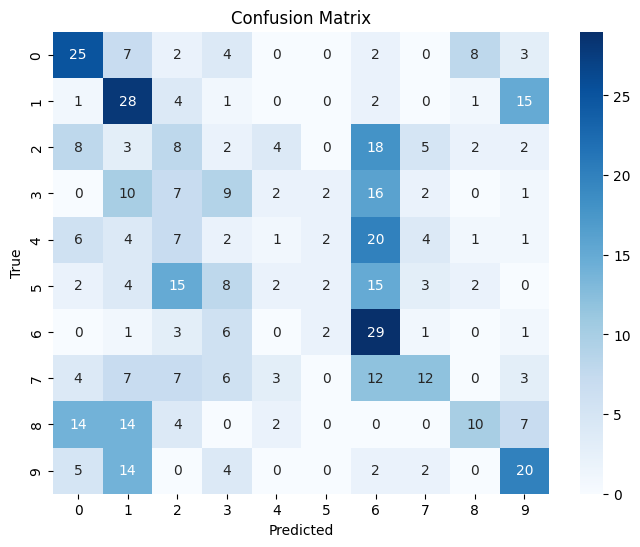

              precision    recall  f1-score   support

     Class 0       0.38      0.49      0.43        51
     Class 1       0.30      0.54      0.39        52
     Class 2       0.14      0.15      0.15        52
     Class 3       0.21      0.18      0.20        49
     Class 4       0.07      0.02      0.03        48
     Class 5       0.25      0.04      0.07        53
     Class 6       0.25      0.67      0.36        43
     Class 7       0.41      0.22      0.29        54
     Class 8       0.42      0.20      0.27        51
     Class 9       0.38      0.43      0.40        47

    accuracy                           0.29       500
   macro avg       0.28      0.29      0.26       500
weighted avg       0.28      0.29      0.26       500



In [ ]:
# 1) Imports & environment setup
import os
import pickle
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix , classification_report

os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
tf.keras.backend.clear_session()

# 2) Load CIFAR-10 batch from pickle
with open("data_batch_1", "rb") as f:
    batch = pickle.load(f, encoding='bytes')

X = batch[b'data']
y = np.array(batch[b'labels'])

# 3) Reshape to image tensors and normalize
X_images = X.reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1).astype("float32") / 255.0

# 4) One-hot encode labels
num_classes = 10
y_cat = tf.keras.utils.to_categorical(y, num_classes=num_classes)

# 5) Subset to keep memory small
X_train, y_train = X_images[:2000], y_cat[:2000]
X_test, y_test = X_images[2000:2500], y_cat[2000:2500]

print("Train set:", X_train.shape, y_train.shape)
print("Test set:", X_test.shape, y_test.shape)

# 6) Define a small MLP model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

# 7) Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# 8) Train the model
history = model.fit(X_train, y_train,
                    epochs=5,
                    batch_size=32,
                    validation_data=(X_test, y_test),
                    verbose=1)

# 9) Evaluate on train and test sets
train_loss, train_acc = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

print(f"Training Accuracy: {train_acc:.4f}, Training Loss: {train_loss:.4f}")
print(f"Testing Accuracy: {test_acc:.4f}, Testing Loss: {test_loss:.4f}")

# 10) Predictions
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

# 11) Confusion matrix
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=[str(i) for i in range(10)],
            yticklabels=[str(i) for i in range(10)])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# 12) Classification report
print(classification_report(y_true, y_pred,target_names=[f"Class {i}" for i in range(10)]))




---
**6. Design and implement a simple RNN model with tensor flow / keras and check accuracy**


Dataset Loaded 
  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


177/177 ━━━━━━━━━━━━━━━━━━━━ 13s 55ms/step - accuracy: 0.6927 - loss: 0.6200 - val_accuracy: 0.6948 - val_loss: 0.6160
Epoch 2/5
177/177 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.6884 - loss: 0.6211 - val_accuracy: 0.6948 - val_loss: 0.6152
Epoch 3/5
177/177 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.6883 - loss: 0.6222 - val_accuracy: 0.6948 - val_loss: 0.6161
Epoch 4/5
177/177 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.6931 - loss: 0.6174 - val_accuracy: 0.6948 - val_loss: 0.6161
Epoch 5/5
177/177 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step - accuracy: 0.6916 - loss: 0.6195 - val_accuracy: 0.6948 - val_loss: 0.6196
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step

 Test Accuracy: 0.6890


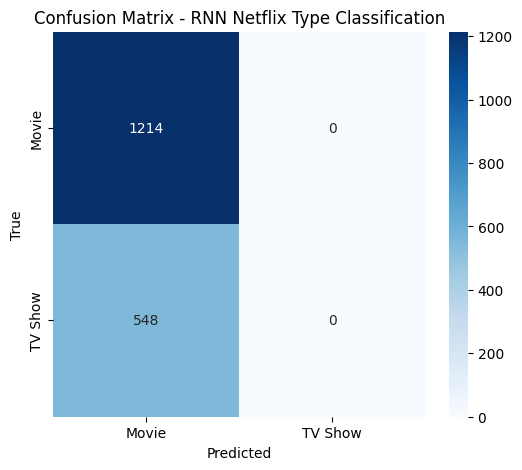


📊 Classification Report:

              precision    recall  f1-score   support

       Movie       0.69      1.00      0.82      1214
     TV Show       0.00      0.00      0.00       548

    accuracy                           0.69      1762
   macro avg       0.34      0.50      0.41      1762
weighted avg       0.47      0.69      0.56      1762



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# 1 Load Dataset
df = pd.read_csv("netflix_titles.csv.csv")
print("Dataset Loaded ")
print(df.head())

# 2 Select relevant columns
df = df[['type', 'description']].dropna()

# 3 Encode target labels (Movie=0, TV Show=1)
label_encoder = LabelEncoder()
df['type_encoded'] = label_encoder.fit_transform(df['type'])

# 4 Text preprocessing
texts = df['description'].values
labels = df['type_encoded'].values

# 5 Tokenize text data
vocab_size = 5000
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
padded = pad_sequences(sequences, maxlen=100, padding='post', truncating='post')

# 6 Split data
X_train, X_test, y_train, y_test = train_test_split(padded, labels, test_size=0.2, random_state=42)

# 7 Build RNN Model
model = Sequential([
    Embedding(vocab_size, 64, input_length=100),
    SimpleRNN(64, activation='tanh'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# 8️ Compile Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 9️ Train Model
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2, verbose=1)

#10 Evaluate Model
y_pred = (model.predict(X_test) > 0.5).astype("int32")
acc = accuracy_score(y_test, y_pred)
print(f"\n Test Accuracy: {acc:.4f}")

# 11 Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Movie', 'TV Show'], yticklabels=['Movie', 'TV Show'])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - RNN Netflix Type Classification")
plt.show()

# 12 Classification Report
print("\n📊 Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=['Movie', 'TV Show']))




---

**7. Design and implement LSTM model with tensor flow / keras and
check accuracy**

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
177/177 ━━━━━━━━━━━━━━━━━━━━ 39s 170ms/step - accuracy: 0.6887 - loss: 0.6274 - val_accuracy: 0.6948 - val_loss: 0.6173
Epoch 2/5
177/177 ━━━━━━━━━━━━━━━━━━━━ 14s 78ms/step - accuracy: 0.6969 - loss: 0.6162 - val_accuracy: 0.6948 - val_loss: 0.6158
Epoch 3/5
177/177 ━━━━━━━━━━━━━━━━━━━━ 14s 77ms/step - accuracy: 0.6970 - loss: 0.6145 - val_accuracy: 0.6948 - val_loss: 0.6216
Epoch 4/5
177/177 ━━━━━━━━━━━━━━━━━━━━ 21s 79ms/step - accuracy: 0.6992 - loss: 0.6142 - val_accuracy: 0.6948 - val_loss: 0.6170
Epoch 5/5
177/177 ━━━━━━━━━━━━━━━━━━━━ 14s 78ms/step - accuracy: 0.6908 - loss: 0.6204 - val_accuracy: 0.6948 - val_loss: 0.6185
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.6691 - loss: 0.6442

Test Accuracy: 0.6890
Test Loss: 0.6243


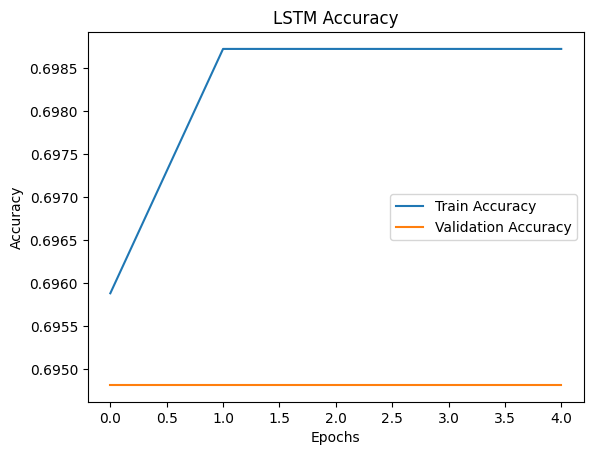

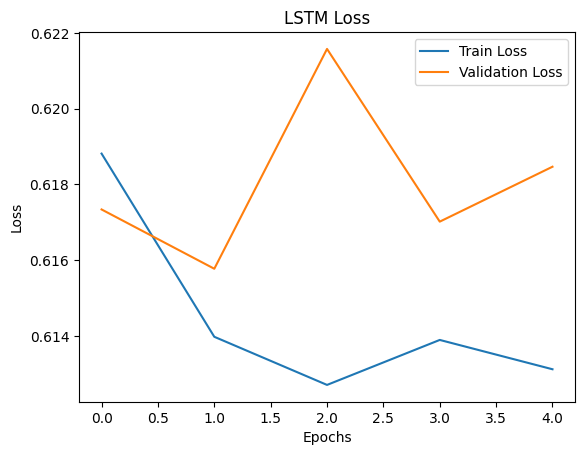

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step

Prediction:
Movie


In [4]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# 1) Load dataset
df = pd.read_csv("netflix_titles.csv.csv") # your dataset
df = df[['type', 'description']].dropna()

# Convert labels (Movie / TV Show) → numbers
le = LabelEncoder()
df['label'] = le.fit_transform(df['type'])

texts = df['description'].values
labels = df['label'].values

# 2) Tokenization + Padding
max_words = 5000 # only keep top 5000 words
max_len = 150 # cut or pad all descriptions to length 150

tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(texts)

sequences = tokenizer.texts_to_sequences(texts)
padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post')

# 3) Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    padded_sequences,
    labels,
    test_size=0.2,
    random_state=42
)

# 4) Build LSTM Model
model = models.Sequential([
    layers.Embedding(input_dim=max_words, output_dim=64, input_length=max_len),
    layers.LSTM(64, return_sequences=False),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Print model summary
model.summary()

# 5) Train the model
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=5,
    batch_size=32,
    verbose=1
)

# 6) Evaluate Accuracy
loss, acc = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {acc:.4f}")
print(f"Test Loss: {loss:.4f}")

# 7) Plot Loss & Accuracy Graphs
import matplotlib.pyplot as plt

# Accuracy graph
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("LSTM Accuracy")
plt.legend()
plt.show()

# Loss graph
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("LSTM Loss")
plt.legend()
plt.show()

# 8) Predict new text
sample = ["Two teenage friends discover a dark secret in their neighborhood."]
seq = tokenizer.texts_to_sequences(sample)
pad = pad_sequences(seq, maxlen=max_len, padding='post')
pred = model.predict(pad)[0][0]

print("\nPrediction:")
print("TV Show" if pred > 0.5 else "Movie")




---

**8. Design and implement GRU model with tensor flow / keras and check accuracy.**

In [5]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# 1. LOAD NETFLIX DATASET
df = pd.read_csv("netflix_titles.csv.csv") # your dataset

# Keep only necessary columns
df = df[['type', 'description']].dropna()

# Encode labels: Movie=0, TV Show=1
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['type'])

texts = df['description'].astype(str).tolist()
labels = df['label'].values

# 2. TEXT TOKENIZATION
vocab_size = 5000
max_len = 100

tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(texts)

sequences = tokenizer.texts_to_sequences(texts)
padded = pad_sequences(sequences, maxlen=max_len, padding='post')

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    padded, labels, test_size=0.2, random_state=42
)

# 3. BUILD GRU MODEL
model = Sequential([
    Embedding(vocab_size, 64, input_length=max_len),
    GRU(64, return_sequences=False),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Show summary
model.summary()

# 4. TRAIN MODEL
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=5,
    batch_size=64
)

# 5. ACCURACY & LOSS
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"\n Test Accuracy: {acc:.4f}")
print(f" Test Loss: {loss:.4f}")


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
111/111 ━━━━━━━━━━━━━━━━━━━━ 19s 111ms/step - accuracy: 0.6800 - loss: 0.6285 - val_accuracy: 0.6890 - val_loss: 0.6241
Epoch 2/5
111/111 ━━━━━━━━━━━━━━━━━━━━ 10s 86ms/step - accuracy: 0.6945 - loss: 0.6168 - val_accuracy: 0.6890 - val_loss: 0.6213
Epoch 3/5
111/111 ━━━━━━━━━━━━━━━━━━━━ 10s 83ms/step - accuracy: 0.6964 - loss: 0.6166 - val_accuracy: 0.6890 - val_loss: 0.6207
Epoch 4/5
111/111 ━━━━━━━━━━━━━━━━━━━━ 10s 90ms/step - accuracy: 0.6932 - loss: 0.6168 - val_accuracy: 0.6890 - val_loss: 0.6200
Epoch 5/5
111/111 ━━━━━━━━━━━━━━━━━━━━ 10s 88ms/step - accuracy: 0.6979 - loss: 0.6156 - val_accuracy: 0.6890 - val_loss: 0.6199

 Test Accuracy: 0.6890
 Test Loss: 0.6199




---

**9.Design and implement a CNN model to classify multi category JPG images with tensor flow /keras and check accuracy. Predict labels for new images**

Train set: (4000, 32, 32, 3) (4000, 10)
Test set: (1000, 32, 32, 3) (1000, 10)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 356,810 (1.36 MB)

 Trainable params: 356,810 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 112ms/step - accuracy: 0.1581 - loss: 2.2171 - val_accuracy: 0.2960 - val_loss: 1.9148
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 66ms/step - accuracy: 0.3243 - loss: 1.8384 - val_accuracy: 0.3660 - val_loss: 1.7568
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 70ms/step - accuracy: 0.3816 - loss: 1.7144 - val_accuracy: 0.4040 - val_loss: 1.6365
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 69ms/step - accuracy: 0.4051 - loss: 1.5991 - val_accuracy: 0.4330 - val_loss: 1.5873
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - accuracy: 0.4812 - loss: 1.4607 - val_accuracy: 0.4560 - val_loss: 1.5596
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - accuracy: 0.5004 - loss: 1.3982 - val_accuracy: 0.4730 - val_loss: 1.4546
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - accuracy: 0.5195 - loss: 1.3103 - val_accuracy: 0.5020 - val_loss: 1.4416
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - accuracy: 0.5732 - loss: 1.1936 - val_accuracy: 0.5290 - 

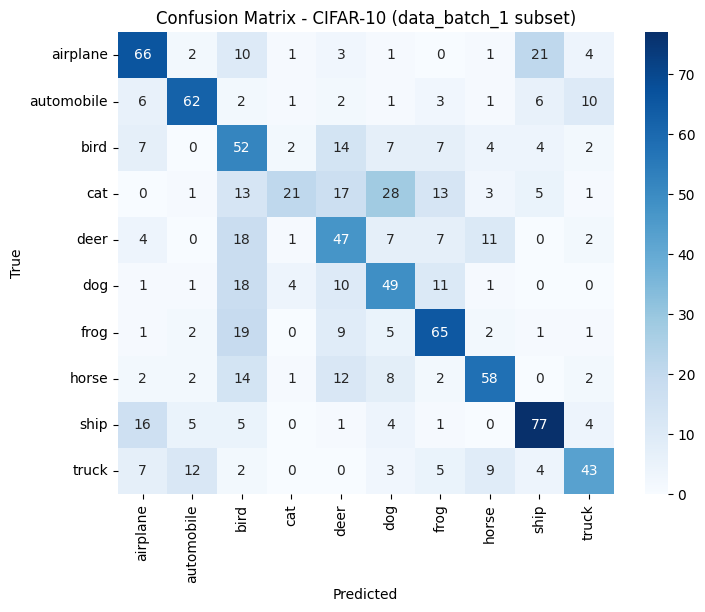

              precision    recall  f1-score   support

    airplane       0.60      0.61      0.60       109
  automobile       0.71      0.66      0.69        94
        bird       0.34      0.53      0.41        99
         cat       0.68      0.21      0.32       102
        deer       0.41      0.48      0.44        97
         dog       0.43      0.52      0.47        95
        frog       0.57      0.62      0.59       105
       horse       0.64      0.57      0.61       101
        ship       0.65      0.68      0.67       113
       truck       0.62      0.51      0.56        85

    accuracy                           0.54      1000
   macro avg       0.57      0.54      0.54      1000
weighted avg       0.57      0.54      0.54      1000

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


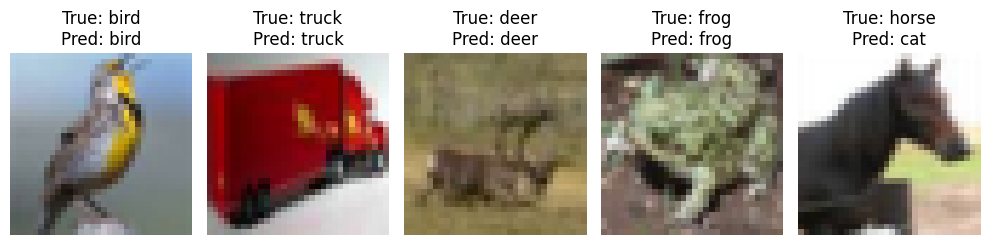

In [6]:
import pickle
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

# 1 Load CIFAR-10 Data
with open("data_batch_1", "rb") as f:
    batch = pickle.load(f, encoding='bytes')

X = batch[b'data']
y = np.array(batch[b'labels'])

# 2️ Reshape & Normalize
X_images = X.reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1).astype("float32") / 255.0

# Label Names
label_names = ['airplane', 'automobile', 'bird', 'cat',
               'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# 3️ One-Hot Encode Labels
num_classes = 10
y_cat = tf.keras.utils.to_categorical(y, num_classes=num_classes)

# 4️ Train/Test Split
X_train, y_train = X_images[:4000], y_cat[:4000]
X_test, y_test = X_images[4000:5000], y_cat[4000:5000]

print("Train set:", X_train.shape, y_train.shape)
print("Test set:", X_test.shape, y_test.shape)

# 5️ Define CNN Architecture
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

# 6️ Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# 7️ Train the Model
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=64,
    validation_data=(X_test, y_test),
    verbose=1
)

# 8️ Evaluate Model
train_loss, train_acc = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

print(f"\n Training Accuracy: {train_acc:.4f}, Loss: {train_loss:.4f}")
print(f" Testing Accuracy: {test_acc:.4f}, Loss: {test_loss:.4f}")

# 9️ Confusion Matrix & Classification Report
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=label_names, yticklabels=label_names)
plt.title("Confusion Matrix - CIFAR-10 (data_batch_1 subset)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

print(classification_report(y_true, y_pred, target_names=label_names))

# Predict New Images
num_samples = 5
idx = np.random.randint(0, len(X_test), num_samples)
sample_images = X_test[idx]
sample_labels = y_true[idx]
sample_preds = np.argmax(model.predict(sample_images), axis=1)

plt.figure(figsize=(10, 4))
for i in range(num_samples):
    plt.subplot(1, num_samples, i+1)
    plt.imshow(sample_images[i])
    plt.title(f"True: {label_names[sample_labels[i]]}\nPred: {label_names[sample_preds[i]]}")
    plt.axis('off')

plt.tight_layout()
plt.show()




---
**11. Implement a CNN architecture (LeNet, Alexnet, VGG, etc) model to classify multi category Satellite images with tensor flow / keras and check the accuracy. Check whether your model is overfit / underfit / perfect fit and apply the techniques to avoid overfit and underfit.**


In [9]:
import pickle
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Load data_batch_1
with open("data_batch_1", "rb") as f:
    batch = pickle.load(f, encoding='bytes')

X = batch[b'data']
y = np.array(batch[b'labels'])

# Reshape to images (N, 32, 32, 3)
X_images = X.reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1).astype("float32") / 255.0

# One-hot encode labels
y_cat = to_categorical(y, num_classes=10)

# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(
    X_images, y_cat, test_size=0.2, random_state=42
)

print("Data loaded:", X_train.shape, X_test.shape)

# Lenet
from tensorflow.keras import layers, models

model_lenet = models.Sequential([
    layers.Conv2D(6, (5,5), activation='tanh', input_shape=(32,32,3), padding='same'),
    layers.AveragePooling2D(pool_size=(2,2)),
    layers.Conv2D(16, (5,5), activation='tanh'),
    layers.AveragePooling2D(pool_size=(2,2)),
    layers.Flatten(),
    layers.Dense(120, activation='tanh'),
    layers.Dense(84, activation='tanh'),
    layers.Dense(10, activation='softmax')
])

model_lenet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_lenet.summary()
model_lenet.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

Data loaded: (8000, 32, 32, 3) (2000, 32, 32, 3)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_37 (Conv2D)              │ (None, 32, 32, 6)      │           456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_2             │ (None, 16, 16, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_38 (Conv2D)              │ (None, 12, 12, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_3             │ (None, 6, 6, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 120)            │        69,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 83,126 (324.71 KB)

 Trainable params: 83,126 (324.71 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 11s 69ms/step - accuracy: 0.2095 - loss: 2.1219 - val_accuracy: 0.3500 - val_loss: 1.8286
Epoch 2/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 10s 67ms/step - accuracy: 0.3555 - loss: 1.8196 - val_accuracy: 0.3680 - val_loss: 1.7586
Epoch 3/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 7s 59ms/step - accuracy: 0.3714 - loss: 1.7744 - val_accuracy: 0.3975 - val_loss: 1.7115
Epoch 4/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 8s 63ms/step - accuracy: 0.3997 - loss: 1.6978 - val_accuracy: 0.4150 - val_loss: 1.6683
Epoch 5/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 8s 65ms/step - accuracy: 0.4146 - loss: 1.6698 - val_accuracy: 0.4255 - val_loss: 1.6594


In [10]:
# AlexNet (Simplified for CIFAR-10)
model_alex = models.Sequential([
    layers.Conv2D(96, (3,3), activation='relu', input_shape=(32,32,3), padding='same'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(256, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(384, (3,3), activation='relu', padding='same'),
    layers.Conv2D(384, (3,3), activation='relu', padding='same'),
    layers.Conv2D(256, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model_alex.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_alex.summary()
model_alex.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_39 (Conv2D)              │ (None, 32, 32, 96)     │         2,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 16, 16, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_40 (Conv2D)              │ (None, 16, 16, 256)    │       221,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_41 (Conv2D)              │ (None, 8, 8, 384)      │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_42 (Conv2D)              │ (None, 8, 8, 384)      │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_43 (Conv2D)              │ (None, 8, 8, 256)      │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 512)            │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,687,178 (21.69 MB)

 Trainable params: 5,687,178 (21.69 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 233s 2s/step - accuracy: 0.1117 - loss: 2.3077 - val_accuracy: 0.1025 - val_loss: 2.3028
Epoch 2/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 226s 2s/step - accuracy: 0.1540 - loss: 2.2036 - val_accuracy: 0.2900 - val_loss: 1.9469
Epoch 3/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 204s 2s/step - accuracy: 0.3105 - loss: 1.8501 - val_accuracy: 0.3895 - val_loss: 1.6026
Epoch 4/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 201s 2s/step - accuracy: 0.3912 - loss: 1.6071 - val_accuracy: 0.4050 - val_loss: 1.5620
Epoch 5/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 196s 2s/step - accuracy: 0.4599 - loss: 1.4756 - val_accuracy: 0.4690 - val_loss: 1.4349


In [11]:
# ZF-Net
model_zf = models.Sequential([
    layers.Conv2D(96, (3,3), strides=1, activation='relu', input_shape=(32,32,3), padding='same'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(256, (3,3), strides=1, activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(384, (3,3), activation='relu', padding='same'),
    layers.Conv2D(384, (3,3), activation='relu', padding='same'),
    layers.Conv2D(256, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model_zf.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_zf.summary()
model_zf.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_44 (Conv2D)              │ (None, 32, 32, 96)     │         2,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 16, 16, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_45 (Conv2D)              │ (None, 16, 16, 256)    │       221,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_46 (Conv2D)              │ (None, 8, 8, 384)      │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_47 (Conv2D)              │ (None, 8, 8, 384)      │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_48 (Conv2D)              │ (None, 8, 8, 256)      │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 512)            │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,687,178 (21.69 MB)

 Trainable params: 5,687,178 (21.69 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 206s 2s/step - accuracy: 0.1104 - loss: 2.2922 - val_accuracy: 0.2140 - val_loss: 2.0335
Epoch 2/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 201s 2s/step - accuracy: 0.2442 - loss: 1.9480 - val_accuracy: 0.3730 - val_loss: 1.7202
Epoch 3/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 193s 2s/step - accuracy: 0.3303 - loss: 1.7508 - val_accuracy: 0.4315 - val_loss: 1.5401
Epoch 4/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 221s 2s/step - accuracy: 0.4225 - loss: 1.5321 - val_accuracy: 0.4805 - val_loss: 1.3936
Epoch 5/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 195s 2s/step - accuracy: 0.4996 - loss: 1.3582 - val_accuracy: 0.4800 - val_loss: 1.4122


In [12]:
# VGGNet (VGG-11 Simplified)
model_vgg = models.Sequential([
    layers.Conv2D(64, (3,3), activation='relu', input_shape=(32,32,3), padding='same'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(256, (3,3), activation='relu', padding='same'),
    layers.Conv2D(256, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model_vgg.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_vgg.summary()
model_vgg.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_49 (Conv2D)              │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_50 (Conv2D)              │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_51 (Conv2D)              │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_52 (Conv2D)              │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 512)            │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,326,346 (12.69 MB)

 Trainable params: 3,326,346 (12.69 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 75s 579ms/step - accuracy: 0.1851 - loss: 2.1719 - val_accuracy: 0.3260 - val_loss: 1.7788
Epoch 2/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 70s 562ms/step - accuracy: 0.3595 - loss: 1.7082 - val_accuracy: 0.4765 - val_loss: 1.4613
Epoch 3/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 81s 556ms/step - accuracy: 0.4481 - loss: 1.4728 - val_accuracy: 0.5235 - val_loss: 1.3103
Epoch 4/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 72s 574ms/step - accuracy: 0.5362 - loss: 1.2581 - val_accuracy: 0.5675 - val_loss: 1.2073
Epoch 5/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 68s 543ms/step - accuracy: 0.6075 - loss: 1.0832 - val_accuracy: 0.5640 - val_loss: 1.1958


In [13]:
# GoogLeNet (Inception Simplified Block)
from tensorflow.keras.layers import concatenate

def inception_module(x, filters):
    f1, f3r, f3, f5r, f5, fpp = filters
    path1 = layers.Conv2D(f1, (1,1), activation='relu', padding='same')(x)
    path2 = layers.Conv2D(f3r, (1,1), activation='relu', padding='same')(x)
    path2 = layers.Conv2D(f3, (3,3), activation='relu', padding='same')(path2)
    path3 = layers.Conv2D(f5r, (1,1), activation='relu', padding='same')(x)
    path3 = layers.Conv2D(f5, (5,5), activation='relu', padding='same')(path3)
    path4 = layers.MaxPooling2D((3,3), strides=(1,1), padding='same')(x)
    path4 = layers.Conv2D(fpp, (1,1), activation='relu', padding='same')(path4)
    return concatenate([path1, path2, path3, path4], axis=-1)

input_layer = layers.Input(shape=(32,32,3))
x = inception_module(input_layer, [32, 32, 32, 16, 16, 16])
x = layers.MaxPooling2D((2,2))(x)
x = inception_module(x, [64, 48, 64, 16, 32, 32])
x = layers.GlobalAveragePooling2D()(x)
output = layers.Dense(10, activation='softmax')(x)

model_google = models.Model(input_layer, output)
model_google.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_google.summary()
model_google.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

Model: "functional_14"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_15      │ (None, 32, 32, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_54 (Conv2D)  │ (None, 32, 32,    │        128 │ input_layer_15[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_56 (Conv2D)  │ (None, 32, 32,    │         64 │ input_layer_15[0… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_24    │ (None, 32, 32, 3) │          0 │ input_layer_15[0… │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_53 (Conv2D)  │ (None, 32, 32,    │        128 │ input_layer_15[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_55 (Conv2D)  │ (None, 32, 32,    │      9,248 │ conv2d_54[0][0]   │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_57 (Conv2D)  │ (None, 32, 32,    │      6,416 │ conv2d_56[0][0]   │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_58 (Conv2D)  │ (None, 32, 32,    │         64 │ max_pooling2d_24… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_2       │ (None, 32, 32,    │          0 │ conv2d_53[0][0],  │
│ (Concatenate)       │ 96)               │            │ conv2d_55[0][0],  │
│                     │                   │            │ conv2d_57[0][0],  │
│                     │                   │            │ conv2d_58[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_25    │ (None, 16, 16,    │          0 │ concatenate_2[0]… │
│ (MaxPooling2D)      │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_60 (Conv2D)  │ (None, 16, 16,    │      4,656 │ max_pooling2d_25… │
│                     │ 48)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_62 (Conv2D)  │ (None, 16, 16,    │      1,552 │ max_pooling2d_25… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_26    │ (None, 16, 16,    │          0 │ max_pooling2d_25… │
│ (MaxPooling2D)      │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_59 (Conv2D)  │ (None, 16, 16,    │      6,208 │ max_pooling2d_25… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_61 (Conv2D)  │ (None, 16, 16,    │     27,712 │ conv2d_60[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_63 (Conv2D)  │ (None, 16, 16,    │     12,832 │ conv2d_62[0][0]   │
│                     │ 32)               │            │                 

 Total params: 74,042 (289.23 KB)

 Trainable params: 74,042 (289.23 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 63s 476ms/step - accuracy: 0.1626 - loss: 2.2202 - val_accuracy: 0.2295 - val_loss: 1.9864
Epoch 2/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 63s 502ms/step - accuracy: 0.2354 - loss: 1.9962 - val_accuracy: 0.2955 - val_loss: 1.8762
Epoch 3/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 81s 494ms/step - accuracy: 0.2922 - loss: 1.8623 - val_accuracy: 0.3245 - val_loss: 1.7525
Epoch 4/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 62s 499ms/step - accuracy: 0.3315 - loss: 1.7489 - val_accuracy: 0.3660 - val_loss: 1.6642
Epoch 5/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 63s 505ms/step - accuracy: 0.3522 - loss: 1.6986 - val_accuracy: 0.3660 - val_loss: 1.6730


In [15]:
from tensorflow.keras import Model, Input, layers

def res_block(x, filters):
    shortcut = x
    if x.shape[-1] != filters:
        shortcut = layers.Conv2D(filters, (1,1), padding='same')(shortcut)

    x = layers.Conv2D(filters, (3,3), padding='same', activation='relu')(x)
    x = layers.Conv2D(filters, (3,3), padding='same')(x)
    x = layers.add([shortcut, x])
    x = layers.Activation('relu')(x)
    return x

input_layer = Input(shape=(32,32,3))
x = layers.Conv2D(32, (3,3), activation='relu', padding='same')(input_layer)
x = res_block(x, 32)
x = layers.MaxPooling2D((2,2))(x)
x = res_block(x, 64)
x = layers.GlobalAveragePooling2D()(x)
output_layer = layers.Dense(10, activation='softmax')(x)

model_resnet = Model(inputs=input_layer, outputs=output_layer)
model_resnet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_resnet.summary()


Model: "functional_15"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_17      │ (None, 32, 32, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_70 (Conv2D)  │ (None, 32, 32,    │        896 │ input_layer_17[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_71 (Conv2D)  │ (None, 32, 32,    │      9,248 │ conv2d_70[0][0]   │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_72 (Conv2D)  │ (None, 32, 32,    │      9,248 │ conv2d_71[0][0]   │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_4 (Add)         │ (None, 32, 32,    │          0 │ conv2d_70[0][0],  │
│                     │ 32)               │            │ conv2d_72[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 32, 32,    │          0 │ add_4[0][0]       │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_28    │ (None, 16, 16,    │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_74 (Conv2D)  │ (None, 16, 16,    │     18,496 │ max_pooling2d_28… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_73 (Conv2D)  │ (None, 16, 16,    │      2,112 │ max_pooling2d_28… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_75 (Conv2D)  │ (None, 16, 16,    │     36,928 │ conv2d_74[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_5 (Add)         │ (None, 16, 16,    │          0 │ conv2d_73[0][0],  │
│                     │ 64)               │            │ conv2d_75[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 16, 16,    │          0 │ add_5[0][0]       │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 64)        │          0 │ activation_3[0][… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_37 (Dense)    │ (None, 10)        │        650 │ global_average_p… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 77,578 (303.04 KB)

 Trainable params: 77,578 (303.04 KB)

 Non-trainable params: 0 (0.00 B)



---
**12. Implement an Auto encoder to de-noise image.**


Dataset loaded: (10000, 32, 32, 3)


Model: "functional_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_18 (InputLayer)     │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_76 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_29 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_77 (Conv2D)              │ (None, 16, 16, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_30 (MaxPooling2D) │ (None, 8, 8, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_78 (Conv2D)              │ (None, 8, 8, 16)       │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 16, 16, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_79 (Conv2D)              │ (None, 16, 16, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_80 (Conv2D)              │ (None, 32, 32, 3)      │           867 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,347 (52.14 KB)

 Trainable params: 13,347 (52.14 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 174ms/step - loss: 0.0468 - val_loss: 0.0173
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 160ms/step - loss: 0.0165 - val_loss: 0.0136
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 181ms/step - loss: 0.0136 - val_loss: 0.0120
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 180ms/step - loss: 0.0122 - val_loss: 0.0111
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 158ms/step - loss: 0.0112 - val_loss: 0.0104
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 161ms/step - loss: 0.0106 - val_loss: 0.0101
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 172ms/step - loss: 0.0105 - val_loss: 0.0096
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 158ms/step - loss: 0.0098 - val_loss: 0.0092
Epoch 9/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 155ms/step - loss: 0.0094 - val_loss: 0.0090
Epoch 10/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 152ms/step - loss: 0.0093 - val_loss: 0.0089

 Test Reconstruction Loss (MSE): 0.0089
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


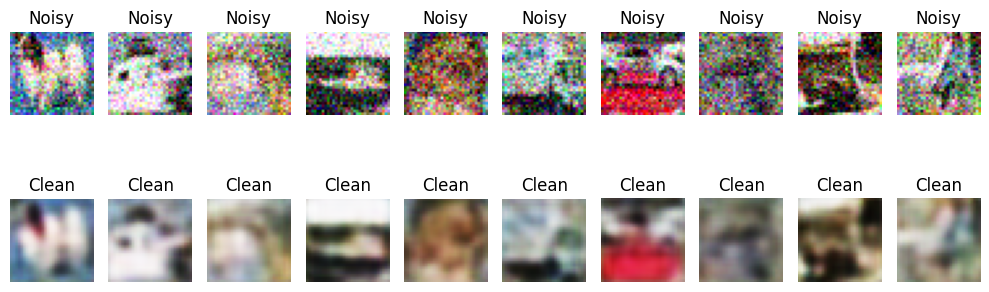

In [16]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D

# 1. Load CIFAR-10 data_batch_1
with open("data_batch_1", "rb") as f:
    batch = pickle.load(f, encoding='bytes')

X = batch[b'data']
X = X.reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)
X = X.astype("float32") / 255.0  # normalize
print("Dataset loaded:", X.shape)

# 2. Add Gaussian noise
noise_factor = 0.2
X_noisy = X + noise_factor * np.random.randn(*X.shape)
X_noisy = np.clip(X_noisy, 0., 1.)

# Split into training/testing
X_train, X_test = X_noisy[:4000], X_noisy[4000:5000]
Y_train, Y_test = X[:4000], X[4000:5000]

# 3. Build Convolutional Autoencoder
input_img = Input(shape=(32, 32, 3))

# --- Encoder ---
x = Conv2D(32, (3,3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2,2), padding='same')(x)
x = Conv2D(16, (3,3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2,2), padding='same')(x)

# --- Decoder ---
x = Conv2D(16, (3,3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2,2))(x)
x = Conv2D(32, (3,3), activation='relu', padding='same')(x)
x = UpSampling2D((2,2))(x)
decoded = Conv2D(3, (3,3), activation='sigmoid', padding='same')(x)

# Create autoencoder model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.summary()

# 4. Train Autoencoder
history = autoencoder.fit(
    X_train, Y_train,
    epochs=10,
    batch_size=64,
    validation_data=(X_test, Y_test)
)

# 5. Evaluate model
loss = autoencoder.evaluate(X_test, Y_test, verbose=0)
print(f"\n Test Reconstruction Loss (MSE): {loss:.4f}")

# 6. Denoise images and visualize
decoded_imgs = autoencoder.predict(X_test[:10])

plt.figure(figsize=(10, 4))
for i in range(10):
    # Noisy
    ax = plt.subplot(2, 10, i + 1)
    plt.imshow(X_test[i])
    plt.title("Noisy")
    plt.axis('off')

    # Denoised
    ax = plt.subplot(2, 10, i + 11)
    plt.imshow(decoded_imgs[i])
    plt.title("Clean")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [18]:
# ==================== 1. TENSOR BASIC OPERATIONS ====================
import tensorflow as tf
# Create tensors
a = tf.constant([1, 2, 3])
b = tf.constant([4, 5, 6])
print("Tensor a:", a)
print("Tensor b:", b)
print("Add:", tf.add(a, b))
print("Multiply:", tf.multiply(a, b))
print("Mean:", tf.reduce_mean(a))

Tensor a: tf.Tensor([1 2 3], shape=(3,), dtype=int32)
Tensor b: tf.Tensor([4 5 6], shape=(3,), dtype=int32)
Add: tf.Tensor([5 7 9], shape=(3,), dtype=int32)
Multiply: tf.Tensor([ 4 10 18], shape=(3,), dtype=int32)
Mean: tf.Tensor(2, shape=(), dtype=int32)


In [19]:
# ==================== 2. TENSOR SPLIT, MERGE & STATISTICS ====================

import tensorflow as tf
# Create tensor
t = tf.constant([[1, 2, 3, 4], [5, 6, 7, 8]])
print("Original:", t)
# Split
split = tf.split(t, 2, axis=1)
print("Split:", split)
# Merge
merged = tf.concat(split, axis=1)
print("Merged:", merged)
# Statistics
print("Mean:", tf.reduce_mean(t))
print("Max:", tf.reduce_max(t))
print("Min:", tf.reduce_min(t))


Original: tf.Tensor(
[[1 2 3 4]
 [5 6 7 8]], shape=(2, 4), dtype=int32)
Split: [<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[1, 2],
       [5, 6]], dtype=int32)>, <tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[3, 4],
       [7, 8]], dtype=int32)>]
Merged: tf.Tensor(
[[1 2 3 4]
 [5 6 7 8]], shape=(2, 4), dtype=int32)
Mean: tf.Tensor(4, shape=(), dtype=int32)
Max: tf.Tensor(8, shape=(), dtype=int32)
Min: tf.Tensor(1, shape=(), dtype=int32)


In [7]:
# ==================== 3. PERCEPTRON FOR IRIS ====================
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load data
iris = load_iris()
X = iris.data
y = (iris.target == 0).astype(int)  # Binary: setosa vs others
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Perceptron
weights = np.random.rand(X.shape[1])
bias = 0
lr = 0.01

# Train
for epoch in range(100):
    for i in range(len(X_train)):
        pred = 1 if np.dot(X_train[i], weights) + bias > 0 else 0
        error = y_train[i] - pred
        weights += lr * error * X_train[i]
        bias += lr * error

# Test
correct = 0
for i in range(len(X_test)):
    pred = 1 if np.dot(X_test[i], weights) + bias > 0 else 0
    if pred == y_test[i]:
        correct += 1

print(f"Accuracy: {correct/len(X_test)*100:.2f}%")


Accuracy: 100.00%


In [10]:
# ==================== 4. MLP FOR TABULAR DATA ====================
import tensorflow as tf
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Load data
iris = load_iris()
X = iris.data
y = iris.target

# Scale features → huge accuracy improvement
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=True
)

activations = ['relu', 'sigmoid', 'tanh']
optimizers = ['adam', 'sgd', 'rmsprop']

results = []

for act in activations:
    for opt in optimizers:

        # Larger model → better capacity
        model = tf.keras.Sequential([
            tf.keras.layers.Dense(32, activation=act),
            tf.keras.layers.Dense(16, activation=act),
            tf.keras.layers.Dense(3, activation='softmax')
        ])

        model.compile(
            optimizer=opt,
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy']
        )

        # More epochs + batch size for stable learning
        model.fit(X_train, y_train, epochs=120, batch_size=8, verbose=0)

        loss, acc = model.evaluate(X_test, y_test, verbose=0)

        print(f"Training with Activation={act}, Optimizer={opt}")
        print(f"Test Accuracy: {acc:.4f}")

        results.append((act, opt, acc))

print("\nSummary of Accuracies:")
for act, opt, acc in results:
    print(f"Activation={act} | Optimizer={opt} | Accuracy={acc:.4f}")


Training with Activation=relu, Optimizer=adam
Test Accuracy: 0.9000
Training with Activation=relu, Optimizer=sgd
Test Accuracy: 0.9000
Training with Activation=relu, Optimizer=rmsprop
Test Accuracy: 0.9000
Training with Activation=sigmoid, Optimizer=adam
Test Accuracy: 0.9000
Training with Activation=sigmoid, Optimizer=sgd
Test Accuracy: 0.8333
Training with Activation=sigmoid, Optimizer=rmsprop
Test Accuracy: 0.8667
Training with Activation=tanh, Optimizer=adam
Test Accuracy: 0.8667
Training with Activation=tanh, Optimizer=sgd
Test Accuracy: 0.9000
Training with Activation=tanh, Optimizer=rmsprop
Test Accuracy: 0.9000

Summary of Accuracies:
Activation=relu | Optimizer=adam | Accuracy=0.9000
Activation=relu | Optimizer=sgd | Accuracy=0.9000
Activation=relu | Optimizer=rmsprop | Accuracy=0.9000
Activation=sigmoid | Optimizer=adam | Accuracy=0.9000
Activation=sigmoid | Optimizer=sgd | Accuracy=0.8333
Activation=sigmoid | Optimizer=rmsprop | Accuracy=0.8667
Activation=tanh | Optimizer=ad

In [13]:
# ==================== 5. MLP FOR 32x32 IMAGES (CIFAR-10) ====================
import tensorflow as tf
import pickle
import numpy as np

# -------- Load CIFAR-10 from data_batch_1 --------
def load_cifar_batch(data_batch_1):
    with open(data_batch_1, 'rb') as f:
        batch = pickle.load(f, encoding='bytes')
    X = batch[b'data']          # shape = (10000, 3072)
    y = np.array(batch[b'labels'])
    return X, y

X_train, y_train = load_cifar_batch("data_batch_1")

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

# Normalize and reshape
X_train = X_train.reshape(-1, 32*32*3) / 255.0
X_test  = X_test.reshape(-1, 32*32*3) / 255.0

# -------- Build MLP --------
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# -------- Train --------
model.fit(X_train, y_train, epochs=5, batch_size=128, verbose=1)

# -------- Test --------
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Accuracy: {acc*100:.2f}%")


Epoch 1/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.1872 - loss: 2.2313
Epoch 2/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.3027 - loss: 1.9420
Epoch 3/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3434 - loss: 1.8442
Epoch 4/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.3419 - loss: 1.8126
Epoch 5/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.3594 - loss: 1.7956
Accuracy: 36.85%


In [15]:
import pandas as pd
df = pd.read_csv("netflix_titles.csv.csv")   # <-- load file

# ==================== 6. SIMPLE RNN ====================
import tensorflow as tf
import numpy as np

# --- Preprocessing Netflix data ---

# Use description text (drop NA)
df = df.dropna(subset=["description"])

# Target: Movie=1, TV Show=0
df["label"] = (df["type"] == "Movie").astype(int)

texts = df["description"].astype(str).tolist()
labels = df["label"].values

# Convert text → sequences of integers
tokenizer = tf.keras.preprocessing.text.Tokenizer(char_level=True)
tokenizer.fit_on_texts(texts)

seqs = tokenizer.texts_to_sequences(texts)

# Pad sequences to length 100
X = tf.keras.preprocessing.sequence.pad_sequences(seqs, maxlen=100)

# Reshape for RNN: (samples, timesteps, features)
X = X.reshape(X.shape[0], X.shape[1], 1)
y = labels

# --- Build RNN ---
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(32, input_shape=(100, 1)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train
model.fit(X, y, epochs=5, verbose=1)

# Test on first 100 samples
loss, acc = model.evaluate(X[:100], y[:100], verbose=0)
print(f"RNN Accuracy: {acc*100:.2f}%")


Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


276/276 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.6980 - loss: 0.6176
Epoch 2/5
276/276 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.7054 - loss: 0.6063
Epoch 3/5
276/276 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.7055 - loss: 0.6064
Epoch 4/5
276/276 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.6961 - loss: 0.6143
Epoch 5/5
276/276 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.7002 - loss: 0.6084
RNN Accuracy: 56.00%


In [16]:
# ==================== 7. LSTM MODEL ====================
import tensorflow as tf
import numpy as np
import pandas as pd

# Load dataset
df = pd.read_csv("netflix_titles.csv.csv")

# Drop missing descriptions
df = df.dropna(subset=["description"])

# Target: Movie=1, TV Show=0
df["label"] = (df["type"] == "Movie").astype(int)

texts = df["description"].astype(str).tolist()
labels = df["label"].values

# Character-level tokenizer
tokenizer = tf.keras.preprocessing.text.Tokenizer(char_level=True)
tokenizer.fit_on_texts(texts)

# Convert text → sequences of integers
seqs = tokenizer.texts_to_sequences(texts)

# Pad/truncate to length 100 characters
X = tf.keras.preprocessing.sequence.pad_sequences(seqs, maxlen=100)

# Reshape for LSTM: (samples, timesteps, features)
X = X.reshape(X.shape[0], X.shape[1], 1)
y = labels

# Build LSTM
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(32, input_shape=(100, 1)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train
model.fit(X, y, epochs=5, verbose=1)

# Test on first 100 samples
loss, acc = model.evaluate(X[:100], y[:100], verbose=0)
print(f"LSTM Accuracy: {acc*100:.2f}%")


Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


276/276 ━━━━━━━━━━━━━━━━━━━━ 18s 53ms/step - accuracy: 0.6937 - loss: 0.6269
Epoch 2/5
276/276 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - accuracy: 0.6971 - loss: 0.6137
Epoch 3/5
276/276 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.6985 - loss: 0.6129
Epoch 4/5
276/276 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.6986 - loss: 0.6129
Epoch 5/5
276/276 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - accuracy: 0.6983 - loss: 0.6130
LSTM Accuracy: 56.00%


In [17]:
# ==================== 8. GRU MODEL ====================
import tensorflow as tf
import numpy as np
import pandas as pd

# Load your dataset
df = pd.read_csv("netflix_titles.csv.csv")

# Remove missing descriptions
df = df.dropna(subset=["description"])

# Target: Movie=1, TV Show=0
df["label"] = (df["type"] == "Movie").astype(int)

texts = df["description"].astype(str).tolist()
labels = df["label"].values

# Character-level tokenizer
tokenizer = tf.keras.preprocessing.text.Tokenizer(char_level=True)
tokenizer.fit_on_texts(texts)

# Convert text to sequences of ints
seqs = tokenizer.texts_to_sequences(texts)

# Pad/truncate each text to 100 characters
X = tf.keras.preprocessing.sequence.pad_sequences(seqs, maxlen=100)

# Reshape: (samples, timesteps, features)
X = X.reshape(X.shape[0], 100, 1)
y = labels

# Build GRU model (same as your dummy model)
model = tf.keras.Sequential([
    tf.keras.layers.GRU(32, input_shape=(100, 1)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train
model.fit(X, y, epochs=5, verbose=1)

# Test on first 100 samples
loss, acc = model.evaluate(X[:100], y[:100], verbose=0)
print(f"GRU Accuracy: {acc*100:.2f}%")


Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


276/276 ━━━━━━━━━━━━━━━━━━━━ 19s 51ms/step - accuracy: 0.6992 - loss: 0.6164
Epoch 2/5
276/276 ━━━━━━━━━━━━━━━━━━━━ 13s 45ms/step - accuracy: 0.6936 - loss: 0.6174
Epoch 3/5
276/276 ━━━━━━━━━━━━━━━━━━━━ 15s 54ms/step - accuracy: 0.6950 - loss: 0.6180
Epoch 4/5
276/276 ━━━━━━━━━━━━━━━━━━━━ 13s 46ms/step - accuracy: 0.7021 - loss: 0.6092
Epoch 5/5
276/276 ━━━━━━━━━━━━━━━━━━━━ 17s 61ms/step - accuracy: 0.6925 - loss: 0.6173
GRU Accuracy: 56.00%


In [21]:
# ==================== 9. CNN FOR JPG IMAGES (CIFAR-10) ====================
import tensorflow as tf
import numpy as np
import pickle
from sklearn.model_selection import train_test_split

# ==================== LOAD CIFAR-10 FROM data_batch_1 ====================
with open("data_batch_1", "rb") as f:
    batch = pickle.load(f, encoding="bytes")

X = batch[b"data"]          # 10000 images, each flattened (3072)
y = np.array(batch[b"labels"])

# Reshape to (N, 32, 32, 3)
X = X.reshape(-1, 32, 32, 3)

# Normalize
X = X / 255.0

# Train-test split since data_batch_1 has no test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ==================== BUILD CNN (unchanged) ====================
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train
model.fit(X_train, y_train, epochs=5, verbose=1)

# Test
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"CNN Accuracy: {acc*100:.2f}%")

# Predict new image (same as your code)
pred = model.predict(X_test[:1])
print(f"Predicted class: {pred.argmax()}")


Epoch 1/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 12s 41ms/step - accuracy: 0.2154 - loss: 2.1247
Epoch 2/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step - accuracy: 0.4069 - loss: 1.6702
Epoch 3/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - accuracy: 0.4623 - loss: 1.5124
Epoch 4/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.4934 - loss: 1.4117
Epoch 5/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.5274 - loss: 1.3195
CNN Accuracy: 52.60%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
Predicted class: 6


In [1]:
# ==================== 10. CNN WITH DROPOUT & REGULARIZATION `====================
import tensorflow as tf
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0
# CNN with regularization
model = tf.keras.Sequential([
tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
tf.keras.layers.MaxPooling2D((2,2)),
tf.keras.layers.Dropout(0.3), # Dropout
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
tf.keras.layers.Dropout(0.3),
tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), verbose=1)
# Check overfitting
train_acc = history.history['accuracy'][-1]
val_acc = history.history['val_accuracy'][-1]
print(f"Train Acc: {train_acc:.2f}, Val Acc: {val_acc:.2f}")
if train_acc - val_acc > 0.1:
  print("Overfitting detected!")
else:
  print("Good fit!")

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 9s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.2624 - loss: 2.1961 - val_accuracy: 0.4121 - val_loss: 1.7805
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3878 - loss: 1.8359 - val_accuracy: 0.4763 - val_loss: 1.6598
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.4042 - loss: 1.7880 - val_accuracy: 0.4814 - val_loss: 1.6590
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4172 - loss: 1.7622 - val_accuracy: 0.4922 - val_loss: 1.6041
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4306 - loss: 1.7398 - val_accuracy: 0.4984 - val_loss: 1.6188
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4348 - loss: 1.7325 - val_accuracy: 0.5084 - val_loss: 1.6004
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4468 - loss: 1.7122 - val_accuracy: 0.5195 - val_loss: 1.5478
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4449 - loss: 1.7042 

Dataset loaded: (10000, 32, 32, 3)


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 16, 16, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 8, 8, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 8, 8, 16)       │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_2 (UpSampling2D)  │ (None, 16, 16, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 16, 16, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_3 (UpSampling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 32, 32, 3)      │           867 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,347 (52.14 KB)

 Trainable params: 13,347 (52.14 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - loss: 0.0478 - val_loss: 0.0194
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0176 - val_loss: 0.0139
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0137 - val_loss: 0.0124
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0122 - val_loss: 0.0110
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0112 - val_loss: 0.0106
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0104 - val_loss: 0.0099
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0101 - val_loss: 0.0094
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0096 - val_loss: 0.0091
Epoch 9/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0094 - val_loss: 0.0089
Epoch 10/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0092 - val_loss: 0.0087

Test Reconstruction Loss (MSE): 0.0087
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step


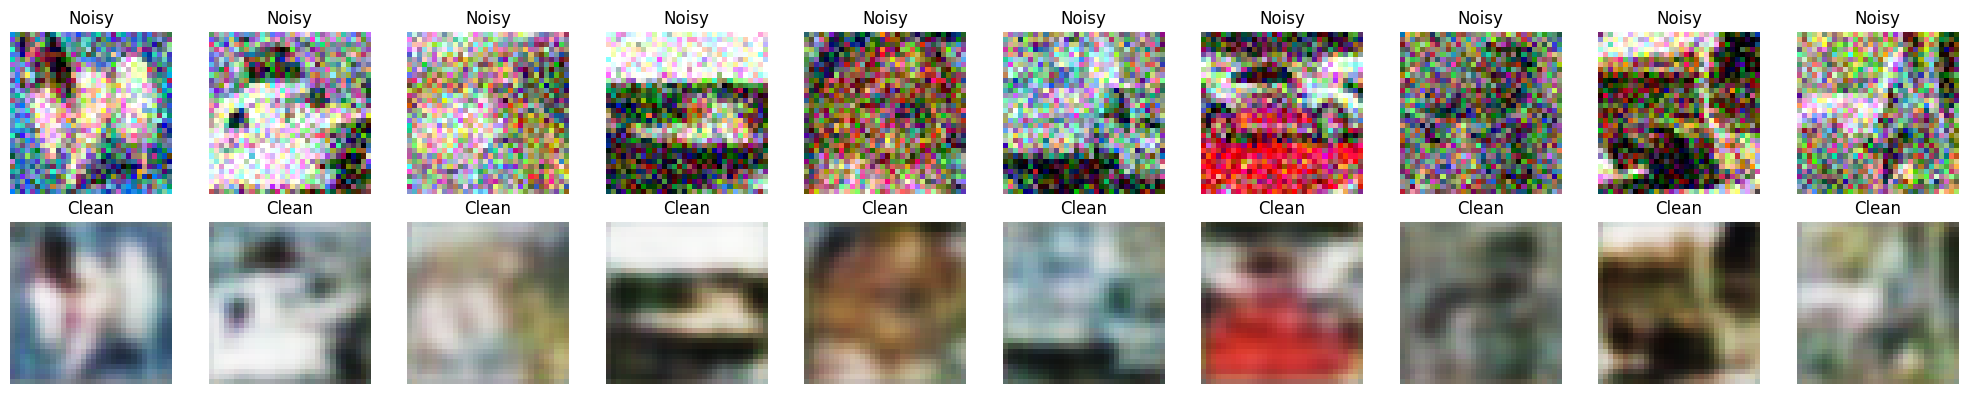

In [5]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D

# 1. Load CIFAR-10 data_batch_1
with open("data_batch_1", "rb") as f:
    batch = pickle.load(f, encoding='bytes')

X = batch[b'data']
X = X.reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)
X = X.astype("float32") / 255.0  # normalize
print("Dataset loaded:", X.shape)

# 2. Add Gaussian noise
noise_factor = 0.2
X_noisy = X + noise_factor * np.random.randn(*X.shape)
X_noisy = np.clip(X_noisy, 0., 1.)

# Split into training/testing
X_train, X_test = X_noisy[:4000], X_noisy[4000:5000]
Y_train, Y_test = X[:4000], X[4000:5000]

# 3. Build Convolutional Autoencoder
input_img = Input(shape=(32, 32, 3))

# Encoder
x = Conv2D(32, (3,3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2,2), padding='same')(x)
x = Conv2D(16, (3,3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2,2), padding='same')(x)

# Decoder
x = Conv2D(16, (3,3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2,2))(x)
x = Conv2D(32, (3,3), activation='relu', padding='same')(x)
x = UpSampling2D((2,2))(x)
decoded = Conv2D(3, (3,3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.summary()

# 4. Train Autoencoder
history = autoencoder.fit(
    X_train, Y_train,
    epochs=10,
    batch_size=64,
    validation_data=(X_test, Y_test)
)

# 5. Evaluate model
loss = autoencoder.evaluate(X_test, Y_test, verbose=0)
print(f"\nTest Reconstruction Loss (MSE): {loss:.4f}")

# 6. Denoise images and visualize
decoded_imgs = autoencoder.predict(X_test[:10])

plt.figure(figsize=(20, 4))
for i in range(10):
    # Noisy images (top row)
    ax = plt.subplot(2, 10, i + 1)
    plt.imshow(X_test[i])
    plt.title("Noisy")
    plt.axis('off')

    # Clean images (bottom row)
    ax = plt.subplot(2, 10, i + 11)
    plt.imshow(decoded_imgs[i])
    plt.title("Clean")
    plt.axis('off')

plt.tight_layout()
plt.show()
